# **LIBRARIES**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import cv2
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import NMF
from sklearn.model_selection import KFold
import time

# **DATASET**

In [ ]:
# Import the drive function from google.colab library.
from google.colab import drive

# Mount Google Drive into the Colab environment.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Upload the dataset.
df = pd.read_pickle("/content/drive/MyDrive/ProgettoDataMining/complete_df.pkl")

# **VISUALIZATION OF THE DATAFRAME**

In [ ]:
# Define a class to perform statistical analysis and visualization on labeled image data in a DataFrame.
class Statistic_of_Dataframe:

    # Define the constructor method for the class.
    def __init__(self):
        # Initialize an empty dictionary to store counts of image shapes.
        self.count = {}

    # Define a method to count image shapes for each class in the DataFrame and store the counts in the dictionary self.count.
    def count_types_image_for_every_class(self, df):
        """
        Counts image shapes for each class in DataFrame df and stores counts in self.count.

        Args:
        - df: DataFrame containing labeled observations and images.
        """
        # Loop through unique labels in the DataFrame.
        for label in df["Label"].unique():
            # Select the rows corresponding to the current label.
            x = df.loc[df['Label'] == label].reset_index(drop=True)
            # Initialize an empty dictionary to store counts for the current label.
            self.count[label] = {}
            # Create an alias for the current count dictionary.
            y = self.count[label]
            # Loop through the selected rows for the current label.
            for i in range(len(x)):
                # Get the image from the current row.
                image = x.at[i, "Image"]
                # Get the shape of the image.
                shape = image.shape
                # If the shape is already in the count dictionary, increment the count for that shape by 1. Otherwise, initialize the count for that shape to 1.
                if shape in y:
                    y[shape] += 1
                else:
                    y[shape] = 1

    # Define a method to create bar plots showing the distribution of image shapes for each class in the dictionary self.count.
    def create_graphics(self, num_item_to_show=10):
        """
        Creates bar plots showing the distribution of image shapes for each class in self.count.

        Args:
        - num_item_to_show: Number of top items to show in each bar plot (default: 10).
        """
        # Check if self.count is empty. If it is empty, print a message.
        if self.count =={}:
            print("Count is empty. Please implement the count_types_image_for_every_class method ")
        # Iterate through each class (label) in self.count.
        for label in self.count.keys():
            # Get the dictionary of shape counts for the current class.
            y = self.count[label]
            x_axis = []
            y_axis = []
            # Sort the shape counts in descending order.
            sorted_tuple_list = sorted(y.items(), key=lambda x: x[1], reverse=True)
            self.count[label] = dict(sorted_tuple_list)
            # Prepare data for plotting.
            for item in sorted_tuple_list:
                x_axis.append(str(item[0]))
                y_axis.append(item[1])
            # Limit the number of items shown in the bar plot to num_item_to_show.
            if len(x_axis) > num_item_to_show:
                x_axis = x_axis[:num_item_to_show]
                y_axis = y_axis[:num_item_to_show]
            # Create and display the bar plot.
            plt.figure(figsize=(10, 6))
            plt.bar(x_axis, y_axis)
            plt.xlabel('Dimension')
            plt.ylabel('Occurrences')
            plt.title(f'Barplot of {label} images')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

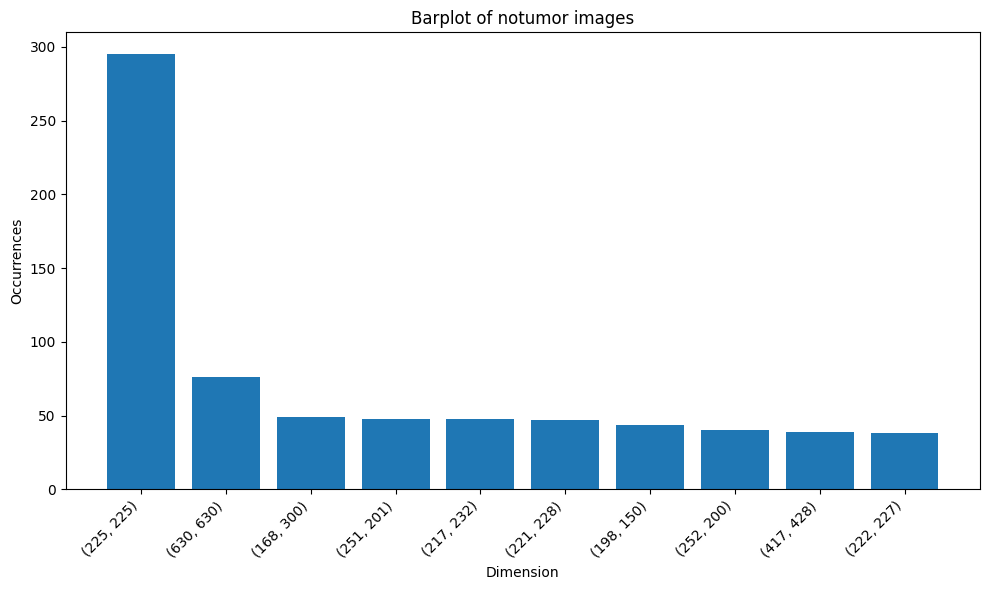

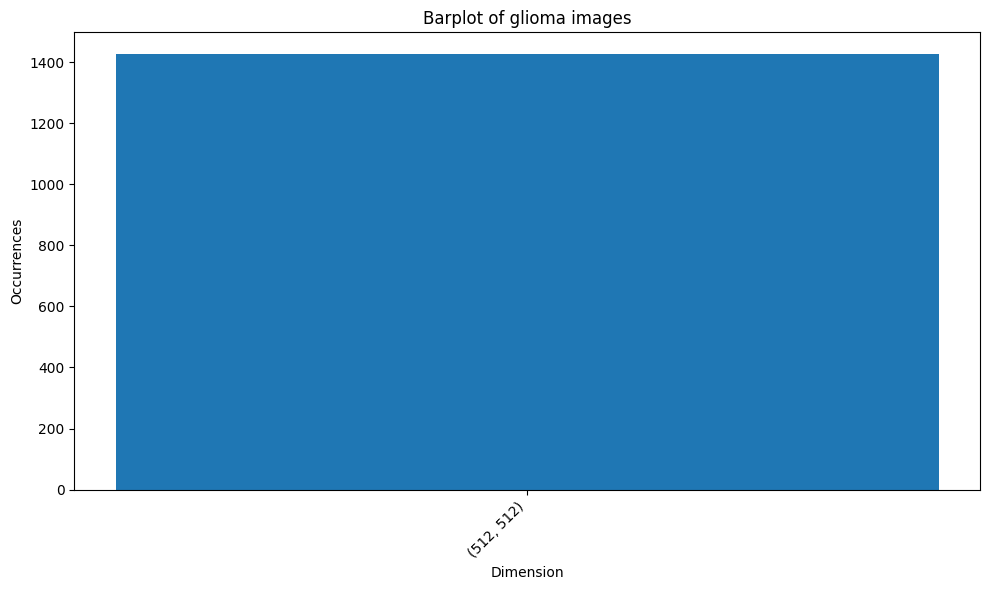

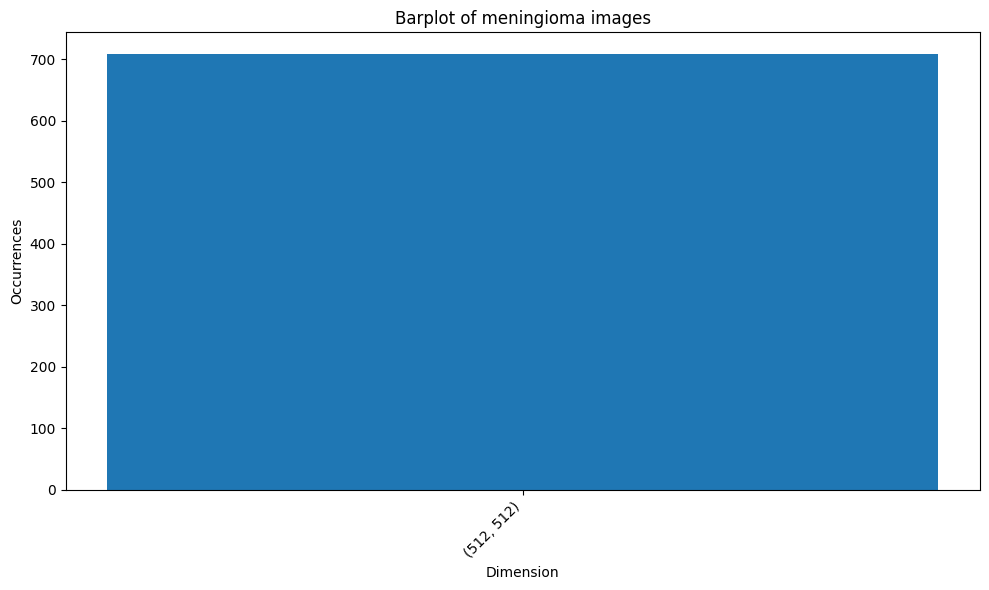

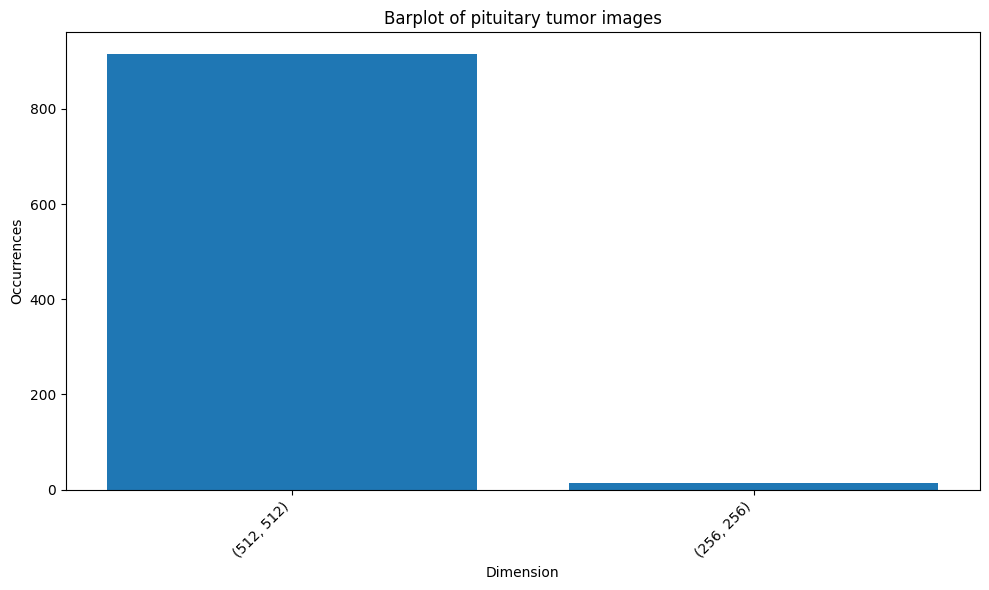

In [ ]:
# Create an instance of the 'Statistic_of_Dataframe' class and assign it to the 'u' variable.
u = Statistic_of_Dataframe()
# Call the 'count_types_image_for_every_class' method on the 'u' object passing the DataFrame as argument.
u.count_types_image_for_every_class(df)
# Call the 'create_graphics' method on the 'u' object.
u.create_graphics()

# **RESIZING**

In [ ]:
# Define a class to resize images stored within a DataFrame and provide visual feedback on the resizing operation through side-by-side image comparisons.
class Resize:

    # Define the constructor method for the class that takes the DataFrame containing image data and a tuple specifying the new size (width, height) to resize the images as arguments.
    def __init__(self, df, size):
        # Store the original DataFrame containing images.
        self.dataframe = df
        # Store the new size for resizing
        self.size = size
        # Initialize to None a placeholder to store the DataFrame after it has been modified by image resizing operations.
        self.new_df = None

    # Define a method to resize the images stored in the Dataframe to a specified size specified by self.size.
    def resize(self):
        """
        Resize images in the DataFrame to the specified size.
        """
        # Create a copy of the original DataFrame.
        self.new_df = self.dataframe.copy()
        # Loop through each row (image) of the DataFrame.
        for i in range(len(self.dataframe)):
            # Get the image from the DataFrame.
            image = self.new_df.at[i, "Image"]
            # Resize the image.
            new_image = cv2.resize(image, self.size)
            # Update the DataFrame with the resized image.
            self.new_df.at[i, "Image"] = new_image

    # Define a method to display before and after images of resizing.
    def show_resize(self, num_example, random_seed=50):
        """
        Display before and after images of resizing.

        Args:
        - num_example: Number of examples to display.
        - random_seed: Seed for random image selection (default: 50).
        """
        # Check if self.new_df is None, meaning the resize method has not been applied. If it is None, print a message.
        if self.new_df is None:
            print("You have to apply the resize method before showing the resized images.")
        else:
            # Set a seed for reproducible random selection of images.
            random.seed(random_seed)
            # Create a figure and axes to prepare for displaying images.
            fig, axes = plt.subplots(num_example, 2, figsize=(8, 20))
            # Initialize variables for iteration through examples and safety check for infinite loop.
            i = 0
            iterations = 0
            # Loop until the specified number of examples is displayed or a safety limit is reached.
            while i < num_example and iterations < 100:
                # Randomly select an index from the original DataFrame.
                index = random.randint(0, len(self.dataframe) - 1)
                # Check if the resized image at the selected index is NaN (Not a Number). If it is NaN, print a message indicating that there is no image at that index and increment the iterations counter.
                if pd.isna(self.new_df.at[index, "Image"]).all():
                    print("There is no image at index", index)
                    iterations += 1
                else:
                    # Retrieve the original and resized images from the original and resized DataFrames.
                    image = self.dataframe.at[index, "Image"]
                    new_image = self.new_df.at[index, "Image"]
                    # Display the original image in the first column of the subplot.
                    axes[i, 0].imshow(image, cmap="gray")
                    axes[i, 0].set_title("Before")
                    axes[i, 0].axis('off')
                    # Display the resized image in the second column of the subplot.
                    axes[i, 1].imshow(new_image, cmap="gray")
                    axes[i, 1].set_title("After")
                    axes[i, 1].axis('off')
                    # Increment the example counter and the safety check counter.
                    i += 1
                    iterations += 1
            # Display the complete figure with all subplots.
            plt.show()

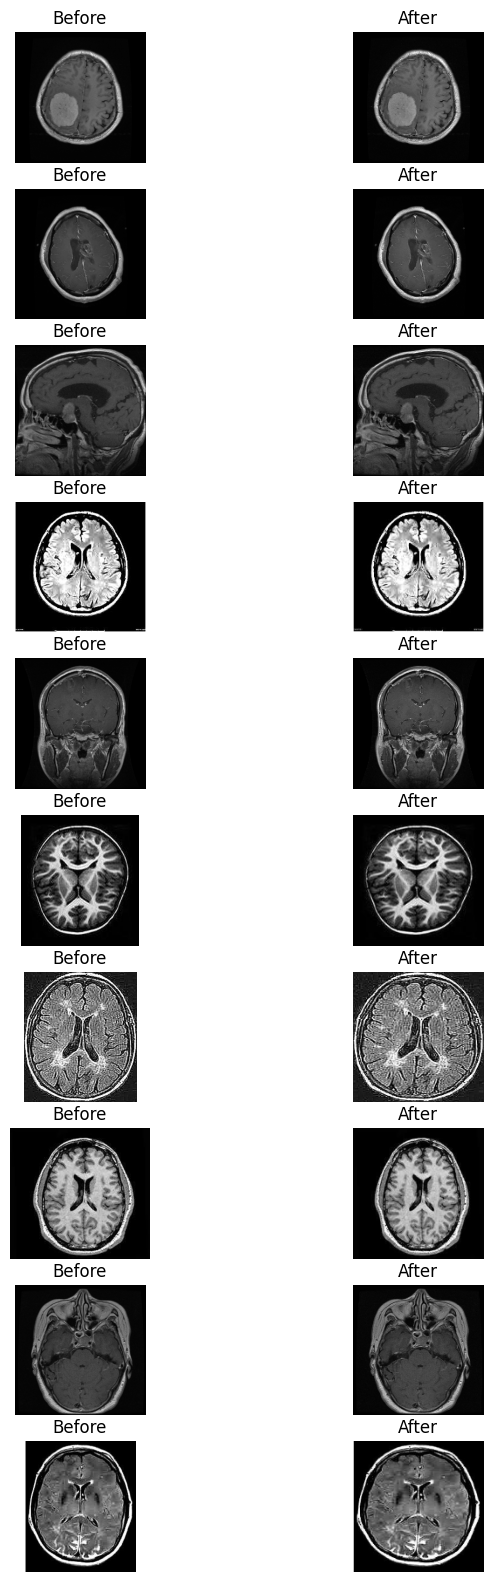

In [ ]:
# Define the size to which images will be resized.
size = (150, 150)
# Define the number of examples (images) to display.
num_example = 10
# Create an instance of the Resize class with df and size.
resizer = Resize(df,size)
# Apply the resize method to resize the images in the DataFrame according to the specified size.
resizer.resize()
# Apply the show_resize method to display before and after images of resizing. In particular, display num_example images and set the random seed to 20 for reproducible results.
resizer.show_resize(num_example, 20)
# Update the original DataFrame df with the resized DataFrame from resizer. In this way, df will contain the images resized to (150, 150) dimensions.
df = resizer.new_df

df_old = df.copy()

# **BALANCED SUBSAMPLE OF THE DATAFRAME**

In [ ]:
# Define a function that takes a DataFrame containing labeled data and creates a balanced subsample from it.
def select_balanced_subdf(df, num_observations, random_state=1):
    """
    Selects a balanced subsample from the DataFrame `df` based on categories defined by the "Label" column.

    Parameters:
    - df: Input DataFrame containing observations and labels.
    - num_observations: Total number of desired observations in the subsample.
    - random_state: Seed for reproducibility of random sampling (default: 1).

    Returns:
    - new: DataFrame containing the balanced subsample.
    """

    # Calculate the number of unique labels (categories) in the DataFrame.
    num_label = len(df["Label"].unique())
    # Calculate the number of observations to select per category.
    num_observations_for_one_category = num_observations // num_label
    # Create an empty DataFrame to store the balanced subsample.
    new = pd.DataFrame()
    # Create a list to keep track of selected indices.
    indexes = []

    # Loop through unique labels in the DataFrame.
    for label in df["Label"].unique():
        # Select the rows corresponding to the current label.
        subset = df.loc[df['Label'] == label]
        # Extend the list of indices with those from the current category.
        indexes.extend(subset.index)
        # Randomly sample a subset from the current category.
        y = subset.sample(n=num_observations_for_one_category, random_state=random_state)
        # Concatenate the sampled subset to 'new' DataFrame and reset index.
        new = pd.concat([new, y]).reset_index(drop=True)

    # If the number of observations in 'new' is less than 'num_observations', add observations from the reserve category.
    if len(new) < num_observations:
        # Select the rows that are not already selected (reserve category).
        reserve = df.loc[~df.index.isin(indexes)]
        # Sample additional necessary observations from the reserve category.
        y = reserve.sample(n=num_observations - len(new), random_state=random_state)
        # Concatenate the new observations to the 'new' DataFrame and reset index.
        new = pd.concat([new, y]).reset_index(drop=True)

    # Return the DataFrame containing the balanced subsample.
    return new

In [ ]:
# Define the total number of observations desired in the balanced subsample.
num_observations = 1000
# Call the 'select_balanced_subdf' function with the original DataFrame 'df' and 'num_observations' as arguments to create a new DataFrame with a balanced representation of each category, as defined by the "Label" column.
subsampled_df = select_balanced_subdf(df, num_observations)
# Shuffle the selected subset randomly with a fixed random seed for reproducibility, and reset the index to get a clean, sequential index.
subsampled_df= subsampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# **NORMALIZED MATRIX**

In [ ]:
# Define a function that takes a DataFrame containing images and creates a normalized matrix where each row corresponds to a flattened and normalized version of an image.
def create_matrix_of_rows_images_normalized(df):

    # Get the number of pixels in a flattened version of the first image to set the dimension of the matrix.
    dimension = len(df.at[0, "Image"].flatten())
    # Create an empty matrix to store the flattened images. The shape of this matrix is: number of images x number of pixels in each flattened image.
    image_matrix = np.empty((len(df), dimension))

    # Iterate through all images in the DataFrame.
    for i in range(len(df)):
        # Get the i-th image from the DataFrame.
        image = df.at[i, "Image"]
        # Print the index of the current image (for tracking progress).
        print(i)
        # Flatten the image into a 1D array (in other terms, turn a 2D image into a 1D array).
        image = image.flatten()
        # Assign the flattened image to the i-th row of the matrix.
        image_matrix[i, :] = image

    # Normalize the pixel values in the matrix by dividing by 255. This scales the pixel values to the range [0, 1].
    image_matrix = image_matrix / 255
    # Return the normalized image matrix.
    return image_matrix

In [ ]:
# Call the function create_matrix_of_rows_images_normalized(df) to generate a normalized matrix of image data.
image_matrix = create_matrix_of_rows_images_normalized(subsampled_df)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
# Retrieve the dimensions (number of rows and columns) of image_matrix.
image_matrix.shape

(1000, 22500)

# **PCA**

In [ ]:
# Initialize PCA with whiten=True to whiten the components. By whitening the data, PCA removes any correlations between features and ensures that each feature contributes equally to the variance calculation during PCA.
# After whitening, the transformed data will have a mean of 0 and a variance of 1 for each feature.
pca = PCA(whiten=True)

# Fit the PCA to the image_matrix to compute the principal components of the data.
pca.fit(image_matrix)

# Extract these principal components (eigenvectors).
principal_component= pca.components_

# Project the original data onto the new coordinate system (encoding) defined by the principal components.
loading = pca.transform(image_matrix)

# Reconstruct the original data from the transformed data.
X_reconstructed = pca.inverse_transform(loading)

In [ ]:
# Compute the explained variance ratio for each principal component obtained from PCA.
variance_ratio = pca.explained_variance_ratio_

# Compute the cumulative sum of explained variance ratios.
cumulative_variance_ratio = np.cumsum(variance_ratio)

# Compute the explained variance for each principal component obtained from PCA.
variance = pca.explained_variance_

# # Example interpretation:
# print("Explained Variance Ratio (First 10 components):", variance_ratio[:10])
# print("Explained Variance (First 10 components):", variance[:10])
# print("Cumulative Explained Variance Ratio (First 10 components):", cumulative_variance_ratio[:10])

# Define the variance thereshold.
threshold = 0.90
# Find the number of principal components to explain at least 90% of the total variance.
n_components_90 = np.argmax(cumulative_variance_ratio >= threshold) + 1

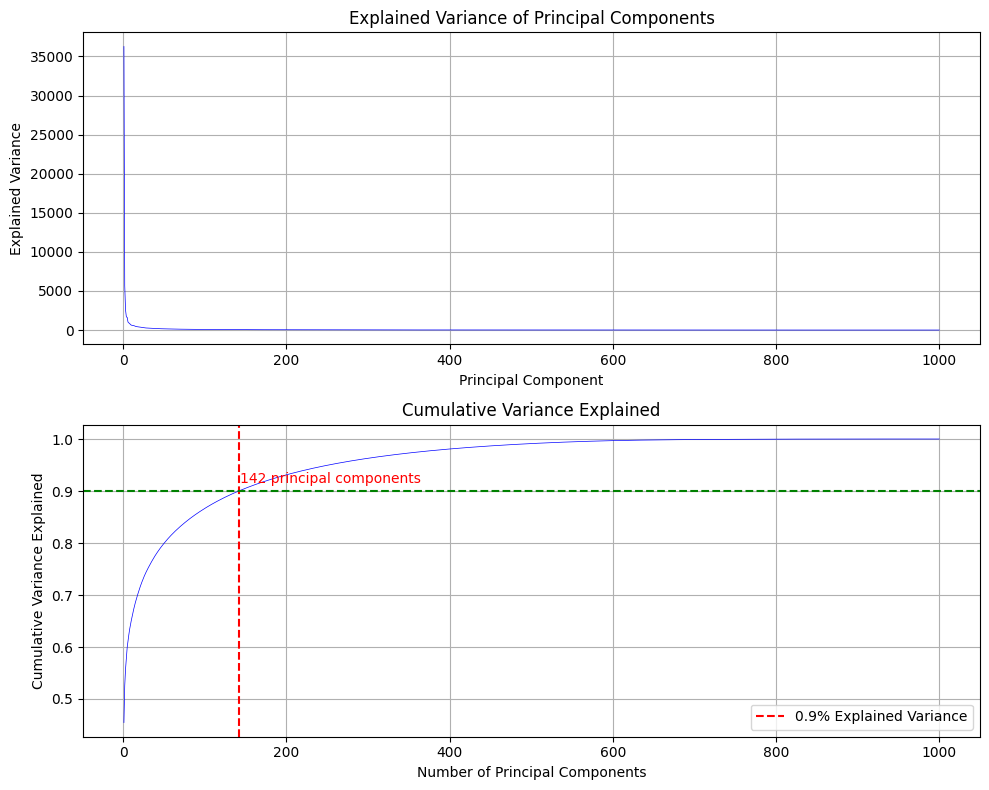

In [ ]:
# Create a figure with a size of 10x8 inches to contain the subplots.
plt.figure(figsize=(10, 8))

# SUBPLOT 1 (Explained Variance of Principal Components)
# SpecifY the first subplot in a 2-row, 1-column grid.
plt.subplot(2, 1, 1)
# Plot the explained variance of each principal component.
plt.plot(np.arange(1, len(variance) + 1), variance, linestyle='-', color='b', linewidth=0.5)
# Set the title and lables for the subplot.
plt.title('Explained Variance of Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
# Display grid lines on the plot for better readability.
plt.grid(True)

# Print a newline for spacing between the subplots.
print("\n"* 1)

# SUBPLOT 2 (Cumulative Variance Explained)
# SpecifY the second subplot in the 2-row, 1-column grid.
plt.subplot(2, 1, 2)
# Plot the cumulative variance explained by including up to each number of principal components.
plt.plot(np.arange(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, linestyle='-', color='b', linewidth=0.5)
# Set the title and lables for the subplot.
plt.title('Cumulative Variance Explained')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
# Add vertical and horizontal lines, and text annotations to highlight specific points of interest.
plt.axvline(x=n_components_90, color='r', linestyle='--', label=f'{threshold}% Explained Variance')
plt.axhline(y=threshold, color='g', linestyle='--')
plt.text(n_components_90 + 1, 0.91, f'{n_components_90} principal components', va='bottom', ha='left', color='r')
# Display grid lines on the plot for better readability.
plt.grid(True)
# Display the legend to explain the meaning of the lines.
plt.legend()

# Adjust subplot parameters to fit neatly within the figure area.
plt.tight_layout()
# Display the plot with all configured subplots and annotations.
plt.show()

### **PCA with 142 principal components and Reconstruction Error**

In [ ]:
# Initialize PCA with whitening and set the number of components to the number needed to explain 90% variance.
pca = PCA(whiten=True, n_components=n_components_90)

# Fit the PCA model to the image data.
pca.fit(image_matrix)

# Extract the principal components (eigenvectors) from the fitted PCA model.
principal_component= pca.components_

# Encode the original image data by transforming it into the PCA space.
loading = pca.transform(image_matrix)

# Reconstruct the original image data from the lower-dimensional representation.
X_reconstructed = pca.inverse_transform(loading)

# Compute the reconstruction error using mean squared error between the original and reconstructed data. Then, print the reconstruction error.
reconstrucitn_error = mean_squared_error(image_matrix,X_reconstructed)
print(reconstrucitn_error)

0.3567830058958513


In [ ]:
# Retrieve the dimensions (number of rows and columns) of the principal components matrix.
# The number of rows corresponds to the number of principal components needed to explain 90% of the variance.
# The number of columns corresponds to the number of features in the original image matrix (total number of pixels in each flattened image).
principal_component.shape

(142, 22500)

In [ ]:
"""path = '/content/drive/MyDrive/ProgettoDataMining/code/Loading_Pca.npy'

# Salva la matrice in un file .npy
np.save(path, loading) """

"path = '/content/drive/MyDrive/ProgettoDataMining/code/Loading_Pca.npy'\n\n# Salva la matrice in un file .npy\nnp.save(path, loading) "

### **Visualization of the first 10 principal components**

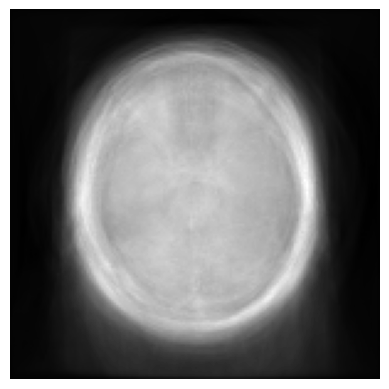

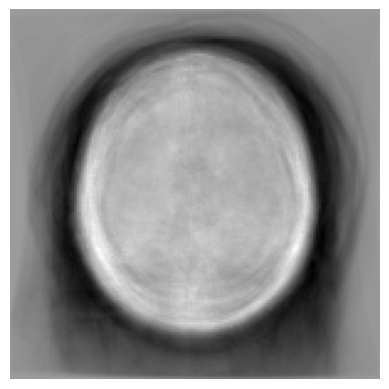

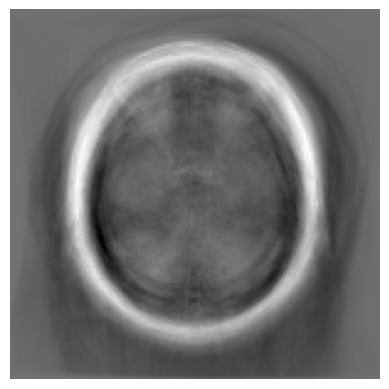

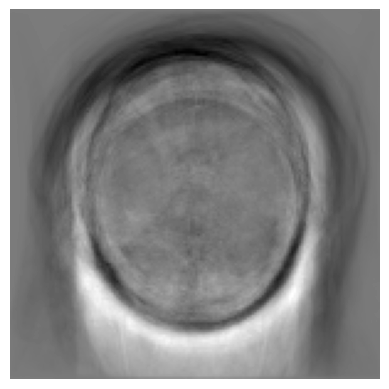

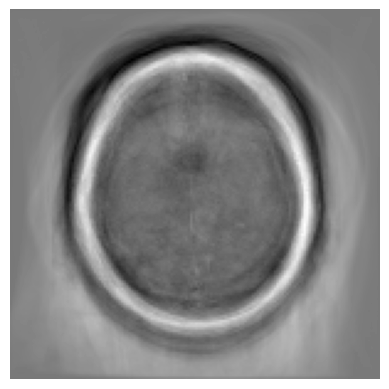

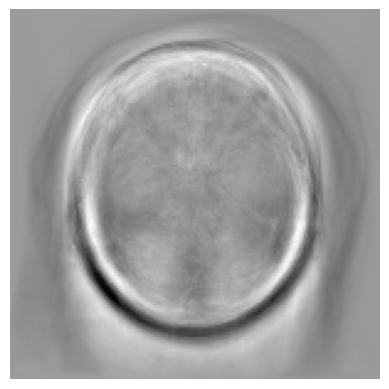

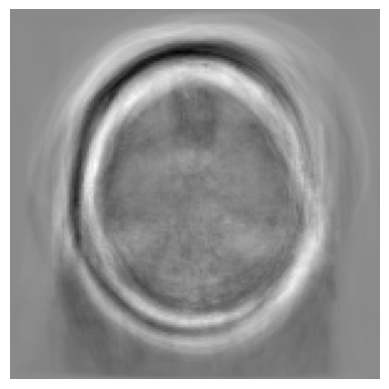

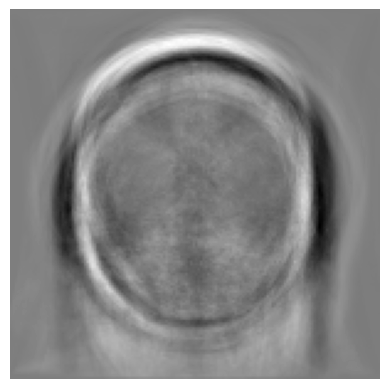

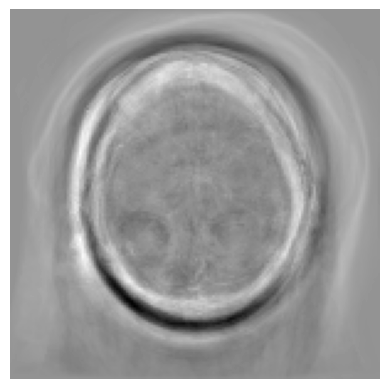

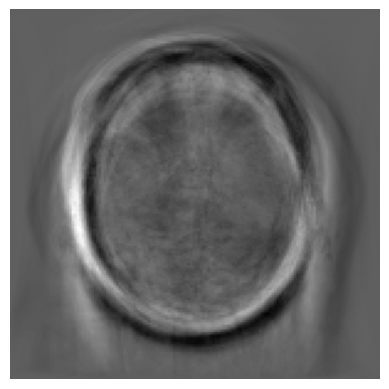

In [ ]:
# Define the number of principal components to display.
num_component = 10

# Iterate through the fisrt 10 principal components.
for i in range(num_component):
    # Display each principal component as an image in grayscale.
    plt.imshow(principal_component[i, :].reshape(size), cmap="gray")
    # Turn off axis labels for cleaner visualization.
    plt.axis('off')
    # Show the current principal component image.
    plt.show()

### **Examples of images before and after PCA**

After PCA:


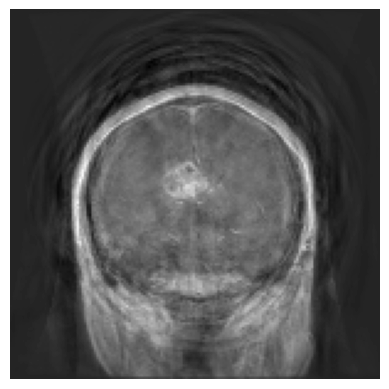

Before PCA:


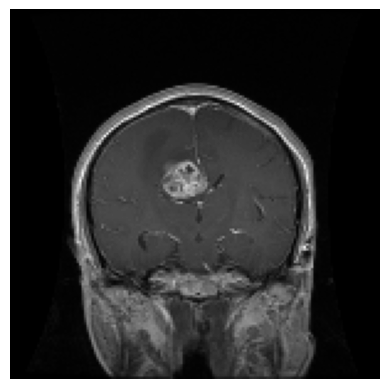




After PCA:


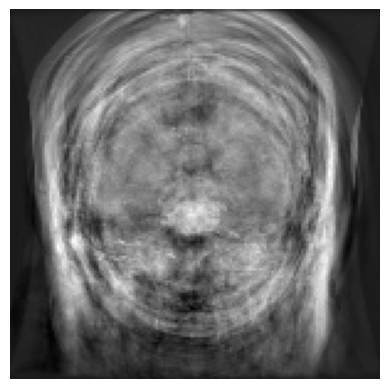

Before PCA:


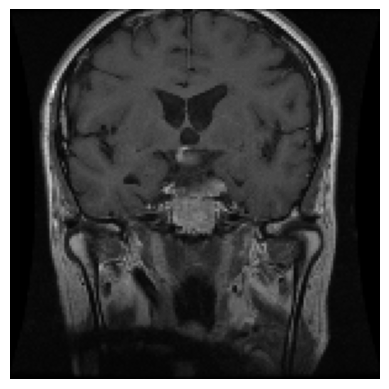




After PCA:


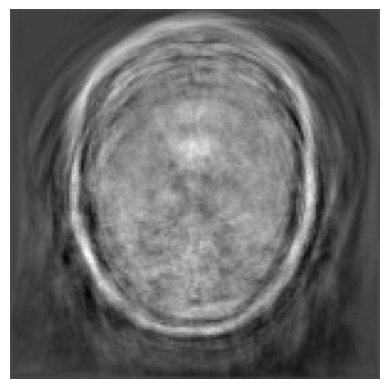

Before PCA:


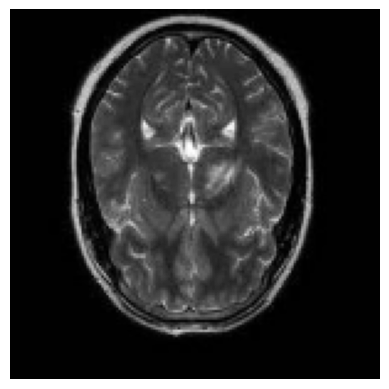




After PCA:


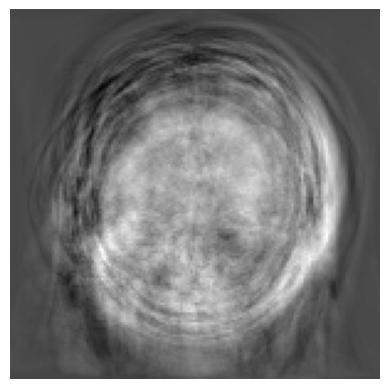

Before PCA:


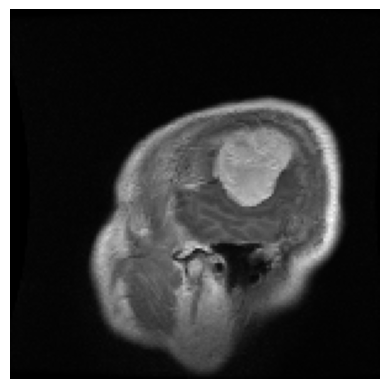




After PCA:


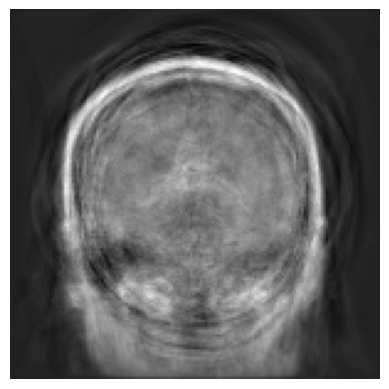

Before PCA:


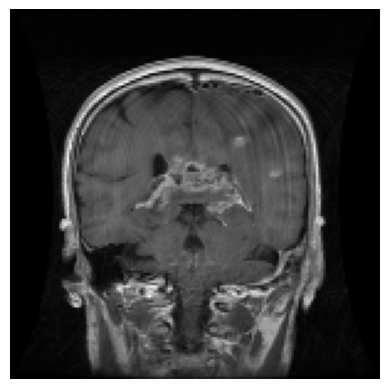




After PCA:


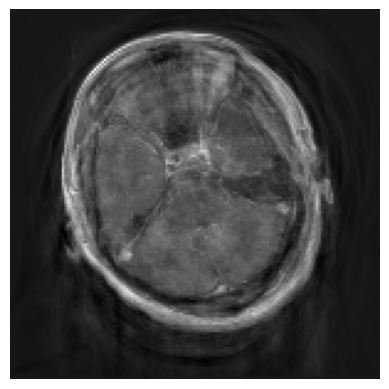

Before PCA:


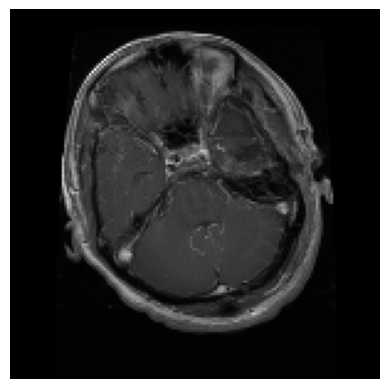




After PCA:


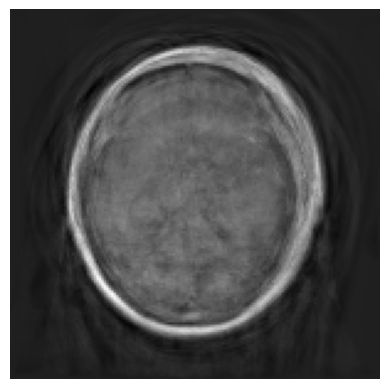

Before PCA:


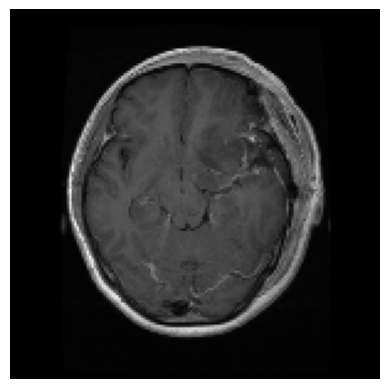




After PCA:


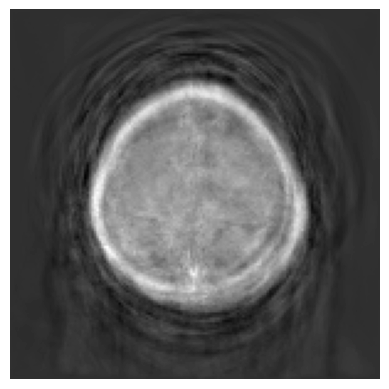

Before PCA:


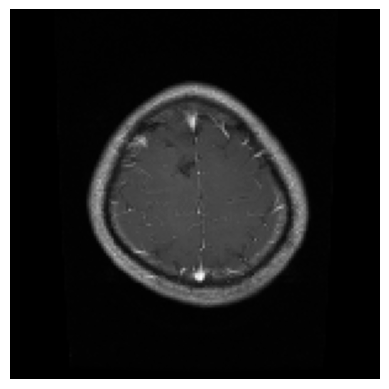




After PCA:


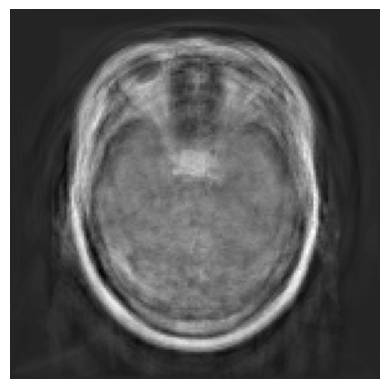

Before PCA:


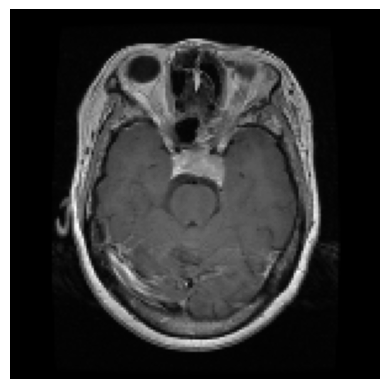




After PCA:


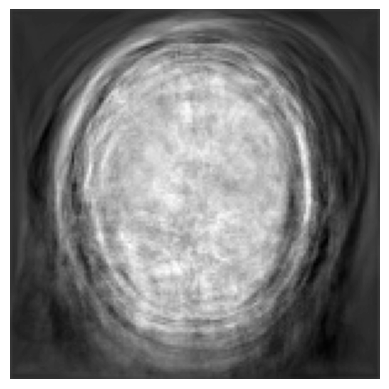

Before PCA:


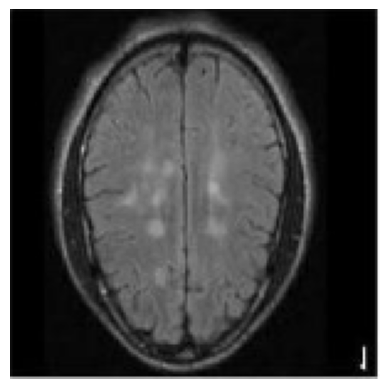

In [ ]:
# Define the number of examples (images) to randomly select and compare.
num_examples = 10
# Initialize the random number generator with a seed value of 78 to ensure reproducibility of random selections.
np.random.seed(74)

# Iterate through each example specified by num_examples.
for i in range(num_examples):
    # Randomly choose an index from the reconstructed images.
    index = np.random.choice(X_reconstructed.shape[0])
    # Display the reconstructed image (after PCA).
    print("After PCA:")
    plt.imshow(X_reconstructed[index, :].reshape(size), cmap="gray")
    plt.axis('off')
    plt.show()
    # Display the original image (Before PCA).
    print("Before PCA:")
    plt.imshow(image_matrix[index, :].reshape(size), cmap="gray")
    plt.axis('off')
    plt.show()
    # Print two blank lines for separation between examples.
    print("\n" * 2)

# **NMF**

In [ ]:
# Define the number of observations to select for small_sample.
num_observations = 200
# Select a balanced subset of data and normalize it into a matrix.
small_sample = select_balanced_subdf(subsampled_df, num_observations)
small_sample = create_matrix_of_rows_images_normalized(small_sample)

# Define the ranks that will be tested to evaluate the NMF model's accuracy and determine the optimal number of components. Start with a single rank of 2, then range from 10 to 99 in steps of 20.
max_rank = 100
vector_1 = np.array([2])
vector_10 = np.arange(10, max_rank, 20)
ranks = np.concatenate((vector_1, vector_10))

# Create three empty lists, which will store the mean squared errors for each rank, NMF model instances for each rank, and W matrices for each rank iteration.
error_vs_rank = []
models = []
W_tot = []
# Start the timer for the iteration process.
start_time_iteration = time.time()

# Iterate over each rank in the ranks array.
for r in ranks:
  # Initialize the NMF model with the current rank (the number of components to extract).
  nmf = NMF(n_components=r, init='nndsvd', max_iter=5000)
  # Fit the NMF model to the small sample and get the factorized matrices W and H.
  W = nmf.fit_transform(small_sample)
  H = nmf.components_
  # Calculate the elapsed time since the start of the iteration.
  elapsed_time_iteration = time.time() - start_time_iteration
  # Transform small_sample into the NMF feature space.
  encoded_images_train = nmf.transform(small_sample)
  # Reconstruct small_sample from the NMF space back to the original space.
  decoded_images_train = nmf.inverse_transform(encoded_images_train)
  # Compute and then print the mean squared error between the original and reconstructed data.
  train_error = mean_squared_error(small_sample, decoded_images_train)
  print(train_error)
  # Append the current error to the error list.
  error_vs_rank.append(train_error)
  # Append the current NMF model in the models list.
  models.append(nmf)
  # Append the W matrix for the current rank iteration.
  W_tot.append(W)
  # Print the elapsed time for the current rank.
  print(f"Elapsed time for rank {r}: {elapsed_time_iteration:.2f} seconds\n")
  # Print additional newlines for better readability.
  print("\n" * 3)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
1.6443620686216813
Elapsed time for rank 2: 31.74 seconds





1.0923070897675637
Elapsed time for rank 10: 59.92 seconds





0.6403220899252511
Elapsed time for rank 30: 162.80 seconds





0.38851745786250974
Elapsed time for rank 50: 274.51 seconds





0.22917096557433478
Elapsed time for rank 70: 502.61

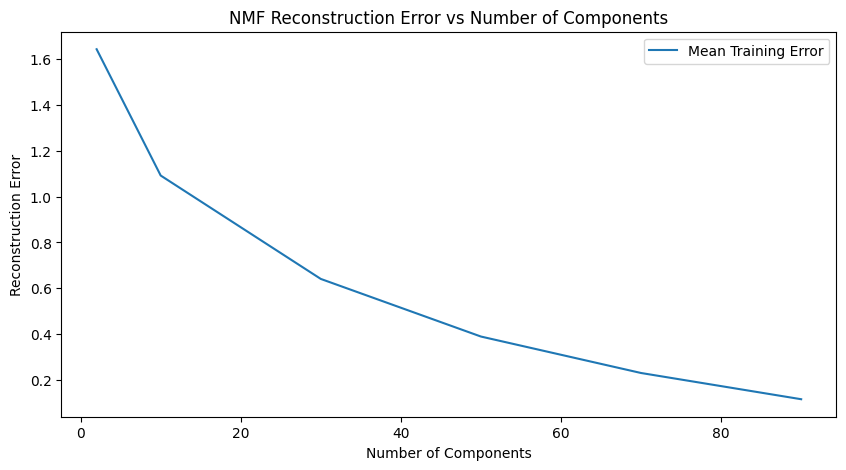

In [ ]:
# Create a new figure with a specific size.
plt.figure(figsize=(10, 5))
# Plot the training error against the number of components.
plt.plot(ranks, error_vs_rank, label='Mean Training Error')
# Label the x-axis and the y-axis.
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
# Add a legend to the plot.
plt.legend()
# Add a title to the plot.
plt.title('NMF Reconstruction Error vs Number of Components')
# Display the plot.
plt.show()

### **NMF with 90 components**

In [ ]:
# Select the 6th NMF model from the list of models (the one with 90 components).
model = models[5]

In [ ]:
# Extract the components matrix 'H' from the selected NMF model.
H = model.components_

## **Visualization of the first 10 components**

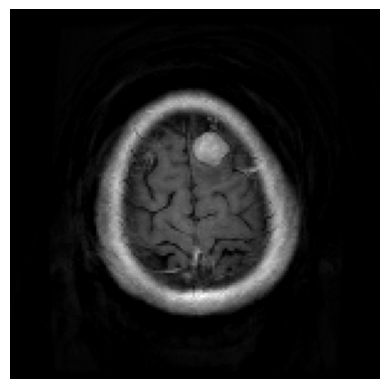

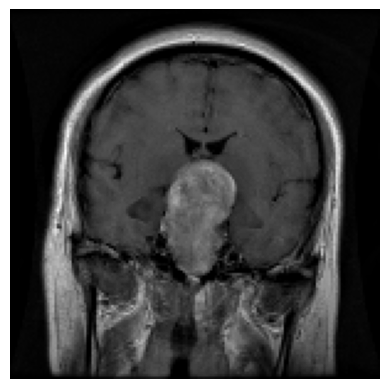

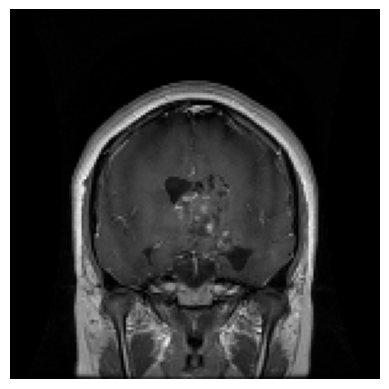

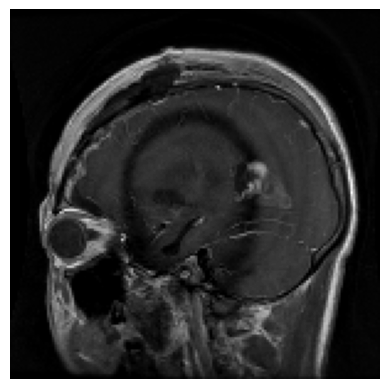

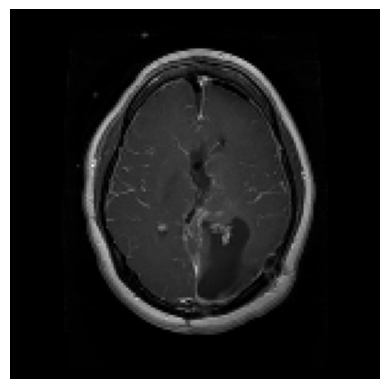

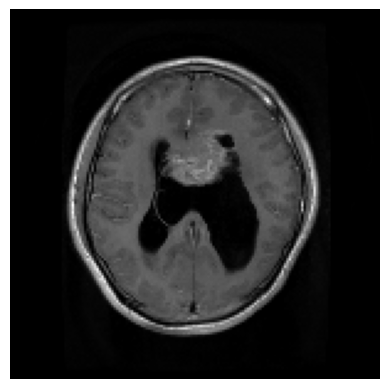

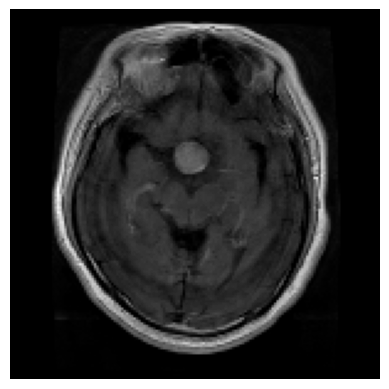

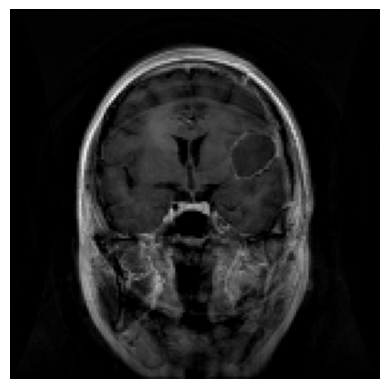

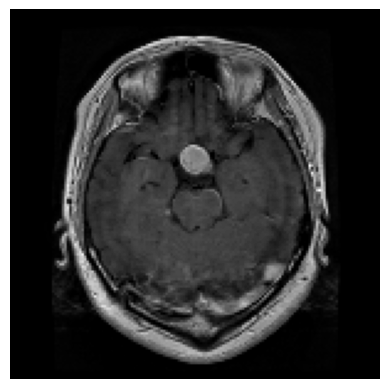

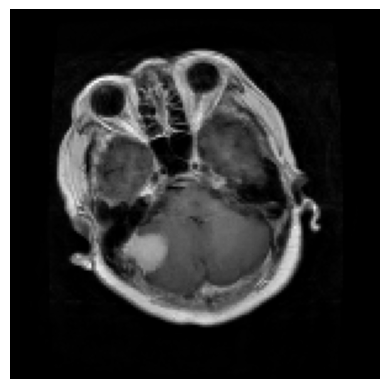

In [ ]:
# Define the number of components to visualize.
num_component = 10

# Loop through the first 10 components.
for i in  range(num_component):
    # Reshape each component matrix H[i, :] to the original image dimensions and display it.
    plt.imshow(H[i, :].reshape(size), cmap="gray")
    # Turn off axis labels and ticks for clarity.
    plt.axis('off')
    # Display the image.
    plt.show()

## **Examples of images before and after NMF**

In [ ]:
# Define the number of examples (images) to randomly select and compare.
num_examples = 10
# Initialize the random number generator with a seed value of 40 to ensure reproducibility of random selections.
np.random.seed(40)

# Iterate through each example specified by num_examples.
for i in range(num_examples):
    # Randomly choose an index from the reconstructed data.
    index = np.random.choice(decoded_images_train.shape[0])
    # Print the selected row index.
    print("Rows:",index)
    # Display the reconstructed image (after NMF).
    print("After nmf:")
    plt.imshow(decoded_images_train[index, :].reshape(size), cmap="gray")
    plt.axis('off')
    plt.show()
    # Display the original image (before NMF).
    print("Before nmf:")
    plt.imshow(small_sample[index, :].reshape(size), cmap="gray")
    plt.axis('off')
    plt.show()
    # Print new lines to separate output visually.
    print("\n" * 10)

Output hidden; open in https://colab.research.google.com to view.

##Create encoded_matrix

In [ ]:
import joblib

model_path = '/content/drive/MyDrive/ProgettoDataMining/nmf_model1.pkl'

# Salva il modello NMF utilizzando joblib
joblib.dump(model, model_path)

['/content/drive/MyDrive/ProgettoDataMining/nmf_model1.pkl']

In [ ]:
"""path = '/content/drive/MyDrive/ProgettoDataMining/W.npy'

# Salva la matrice in un file .npy
np.save(path, Encoded_matrix)"""

NameError: name 'Encoded_matrix' is not defined

In [ ]:
path = '/content/drive/MyDrive/ProgettoDataMining/H.npy'

# Salva la matrice in un file .npy
np.save(path, H)

In [ ]:
tot_image_matrix = create_matrix_of_rows_images_normalized(df_old)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

##Entire dataframe

In [ ]:
Encoded_matrix = model.transform(tot_image_matrix)

KeyboardInterrupt: 

In [ ]:
df_X = pd.DataFrame(Encoded_matrix)
df_X["Label"] = df_old["Label"]
df_statistic = df_X

In [ ]:
path = '/content/drive/MyDrive/ProgettoDataMining/df_statistic2.pkl'

df_statistic.to_pickle(path)